# Prediccion de tipo de tumor referente al cancer de mama utilizando Machine Learning

# Datos

Los datos que utilizaremos para el siguiente modelo son del sitio:
https://www.kaggle.com/

Utilizando el siguiente set de datos:
https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

# Informacion acerca del set de datos

El cancer de mama es el tipo de cancer mas comun entre las mujeres. Suma el 25% de todos los casos de cancer, y ha afectado alrededor de 2.1 millones de personas solamente en el 2015. Este cancer inicia
cuando las celulas en los senos empiezan a crecer sin control. Estas celulas usalmente forman tumores
que pueden ser vistos via rayos X o que tambien pueden sentirse en el area del seno.

El mayor reto en su deteccion es el como clasificar los tumores en maligno (canceroso) o benigno (no
canceroso).

# Columnas

## Columnas
* id                       
* diagnosis                
* radius_mean              
* texture_mean             
* perimeter_mean           
* area_mean                
* smoothness_mean          
* compactness_mean         
* concavity_mean           
* concave points_mean      
* symmetry_mean            
* fractal_dimension_mean   
* radius_se                
* texture_se               
* perimeter_se             
* area_se                  
* smoothness_se            
* compactness_se           
* concavity_se             
* concave points_se        
* symmetry_se              
* fractal_dimension_se     
* radius_worst             
* texture_worst            
* perimeter_worst          
* area_worst               
* smoothness_worst         
* compactness_worst        
* concavity_worst          
* concave points_worst     
* symmetry_worst           
* fractal_dimension_worst  

## Herramientas y analisis basico de los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("../Breast_Cancer_project/data.csv")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
df.diagnosis.value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

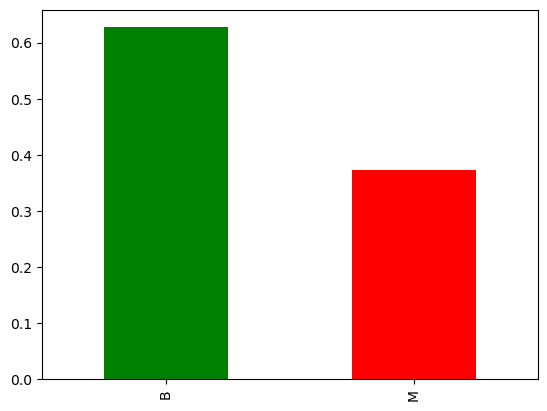

In [5]:
df.diagnosis.value_counts(normalize = True).plot(kind = "bar", color= ["green", "red"]);

Nota: Los datos estan desbalanceados

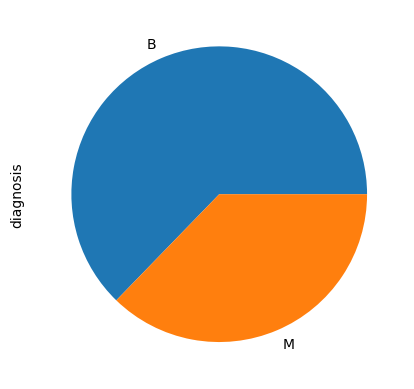

In [6]:
df.diagnosis.value_counts().plot(kind = "pie");

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Se retiran las columnas que no son necesarias para el proceso de prediccion
df_plus = df.drop(['id', 'Unnamed: 32'], axis = 1)
df_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
# Cambiamos el tipo de dato de la columna 'category' ya que no es de tipo numerico

for label, content in df_plus.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

diagnosis


In [11]:
for label, content in df_plus.items():
    if pd.api.types.is_string_dtype(content):
        df_plus[label] = content.astype("category").cat.as_ordered()

In [12]:
df_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

In [13]:
# Utilizamos LabelEncoder para cambiar el tipo de dato categoria a entero

laber = LabelEncoder()
df_plus["diagnosis"] = laber.fit_transform(df_plus["diagnosis"])

In [14]:
df_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
df_plus.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Tumor maligno = 1
Tumor Benigno = 0

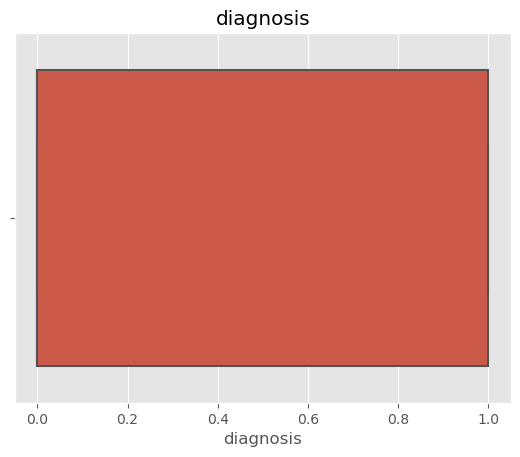

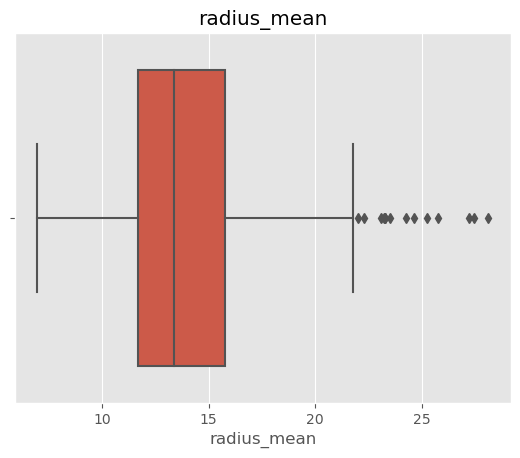

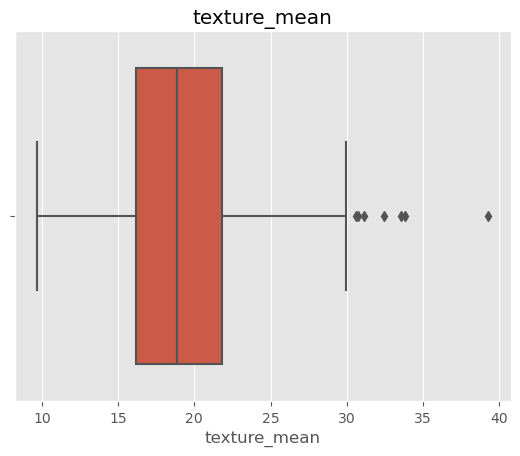

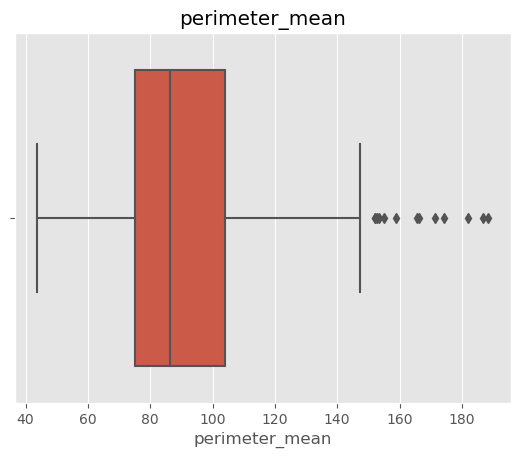

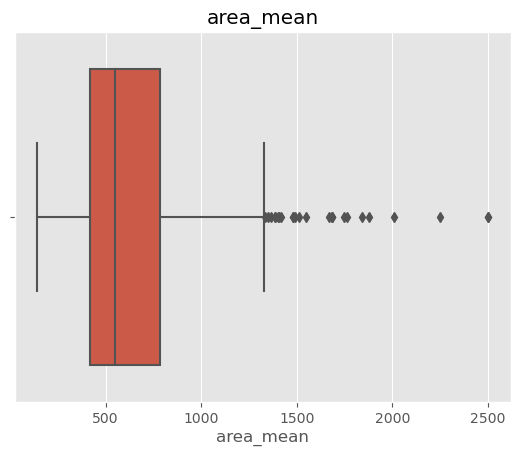

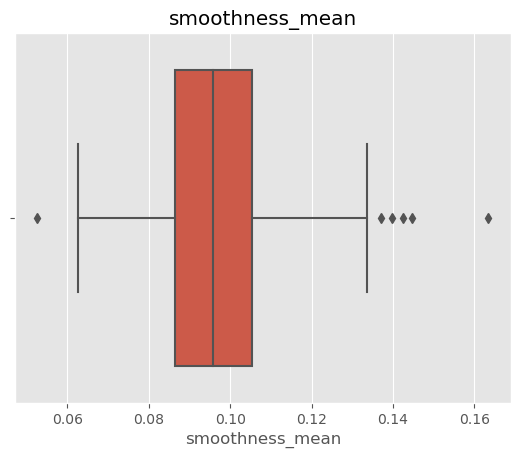

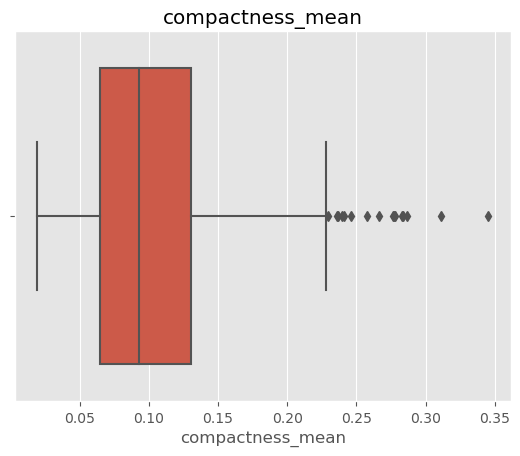

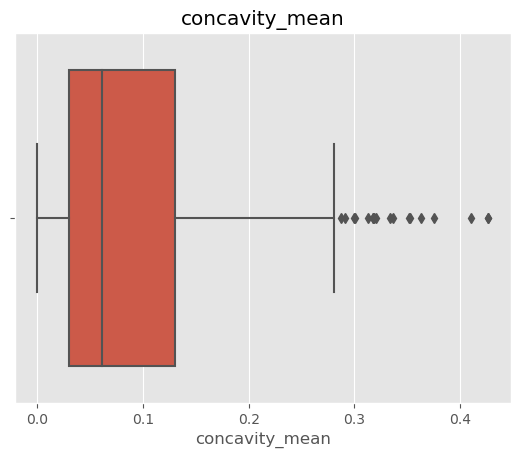

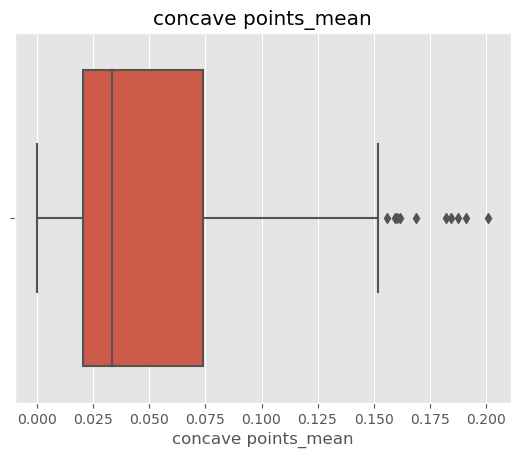

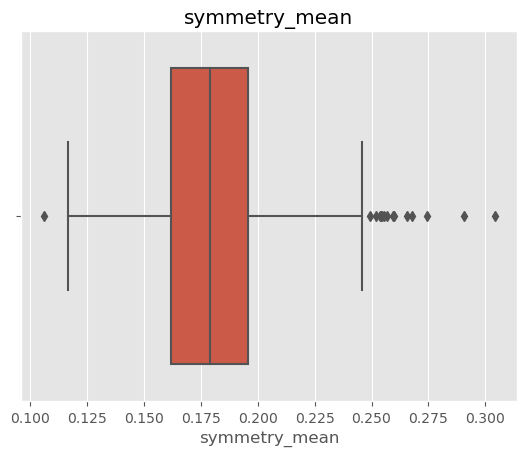

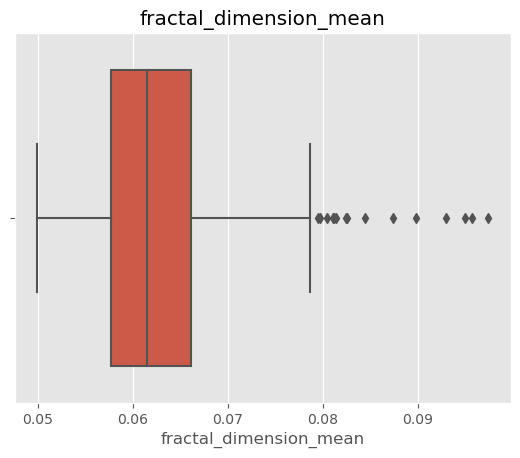

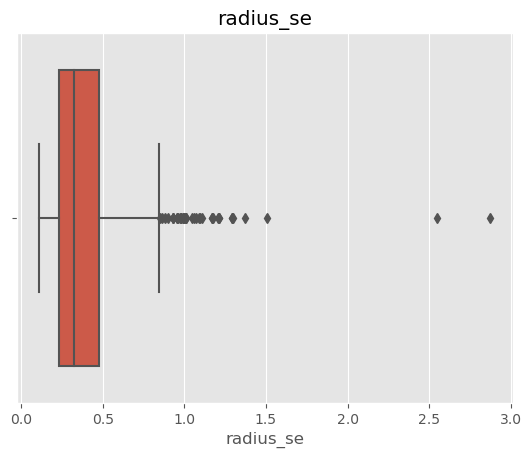

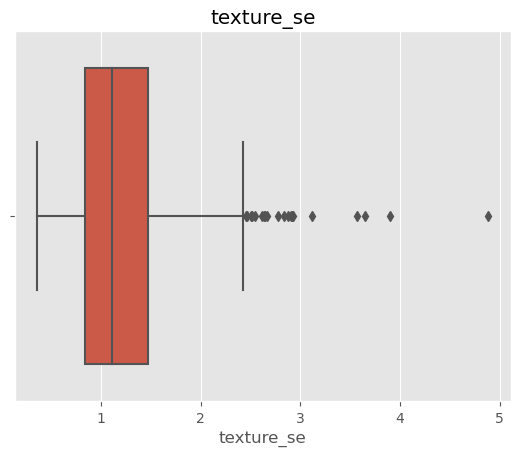

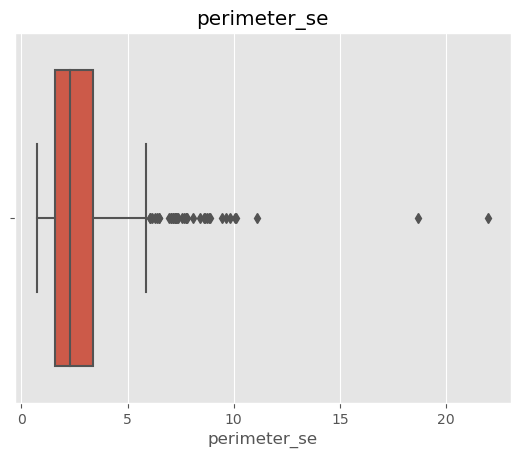

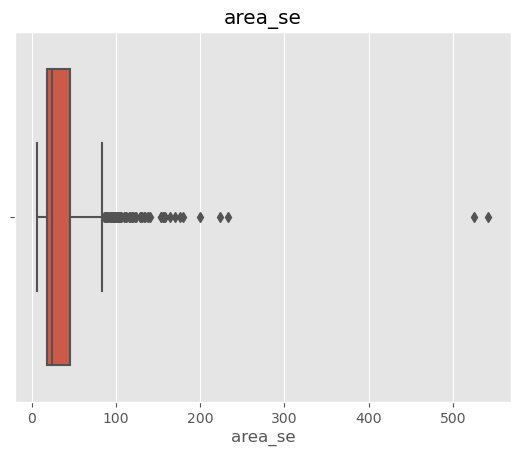

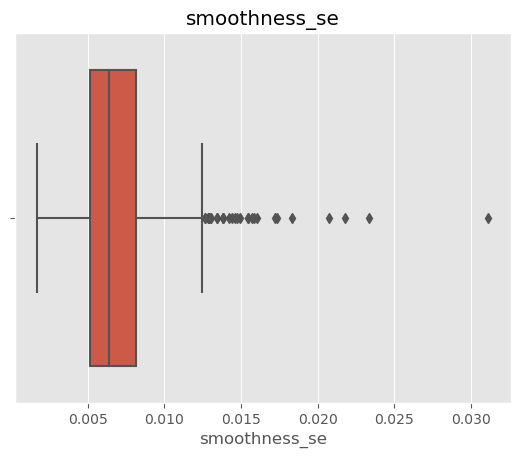

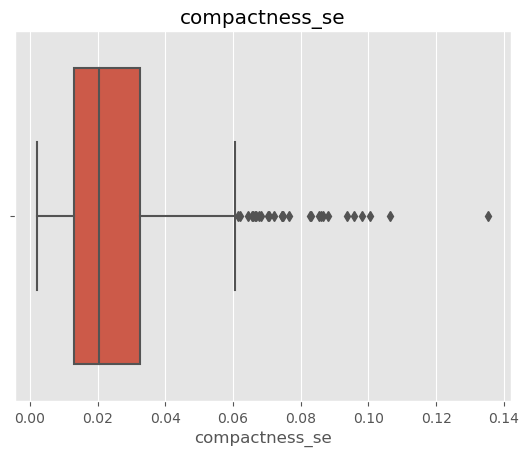

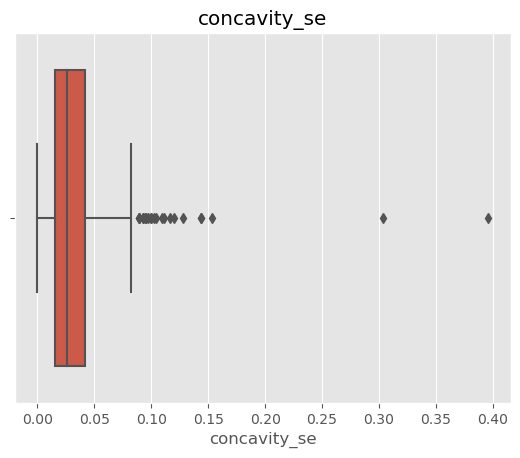

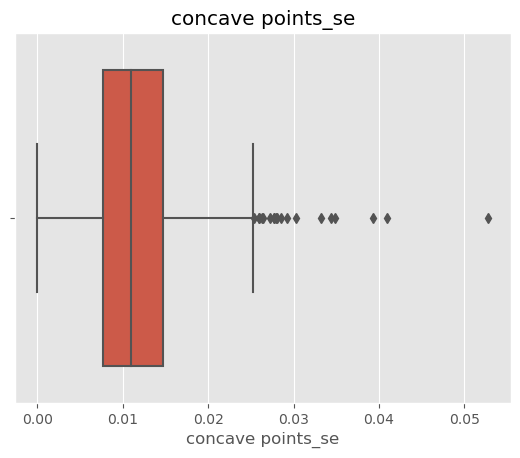

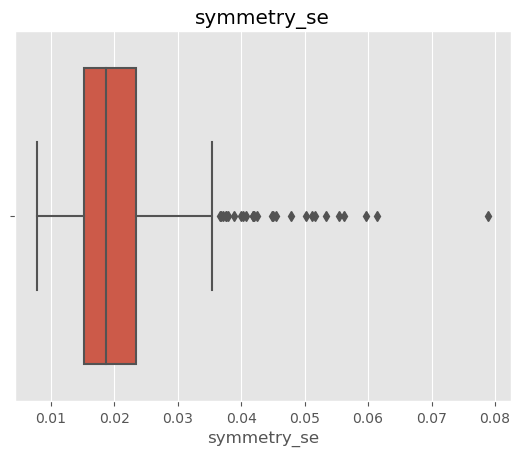

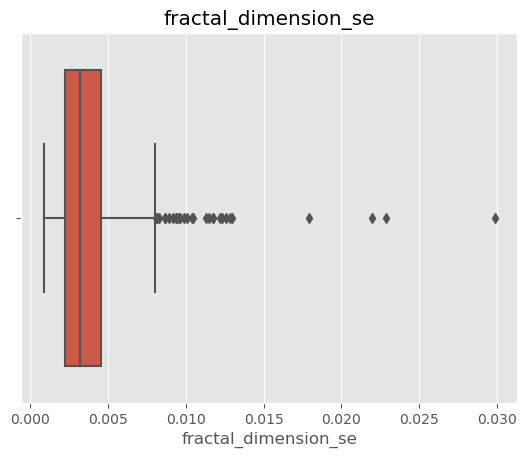

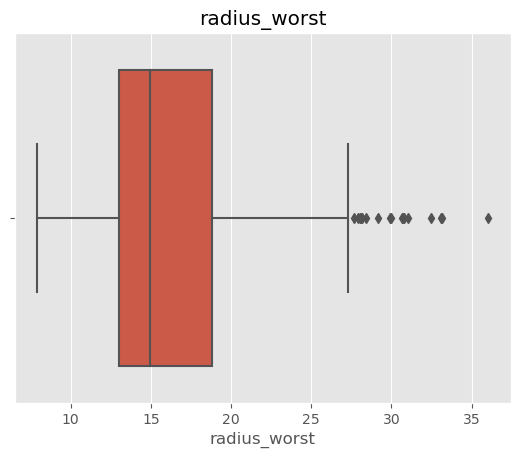

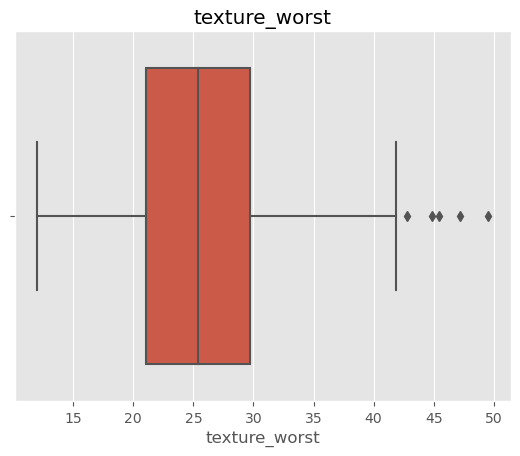

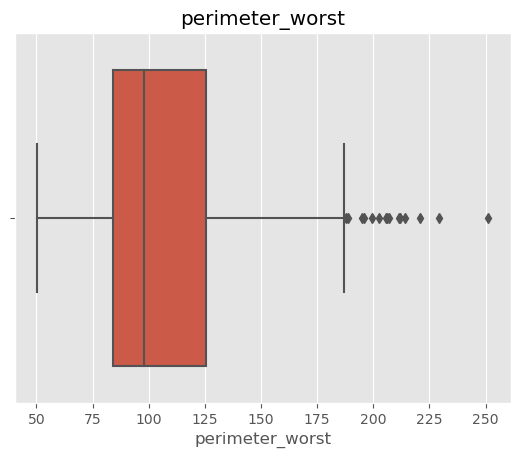

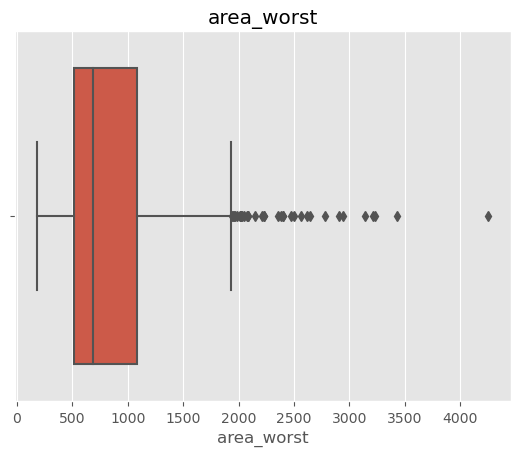

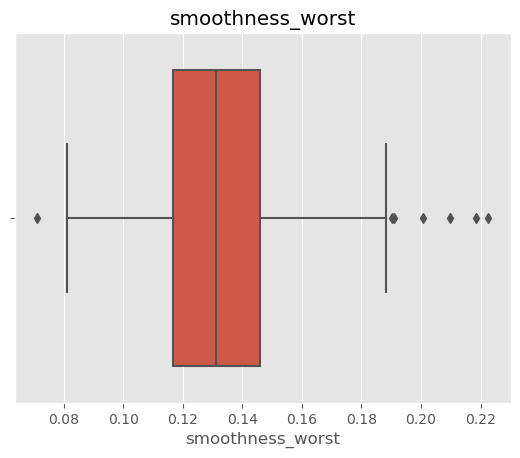

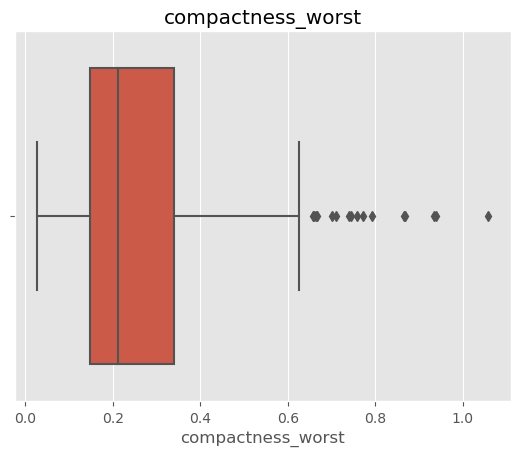

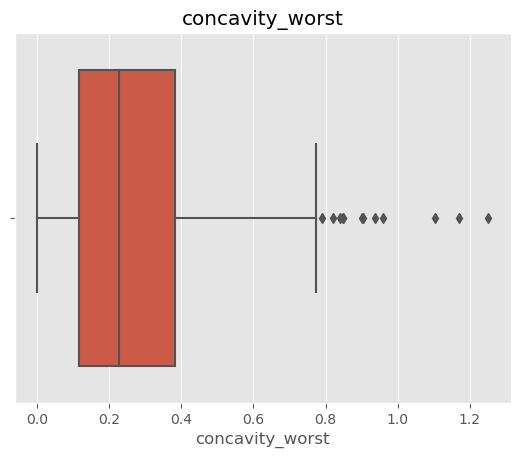

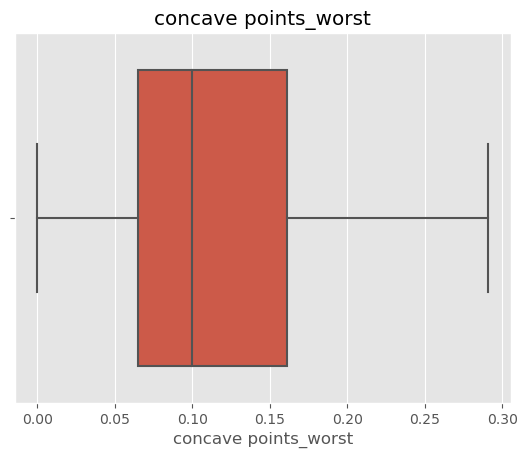

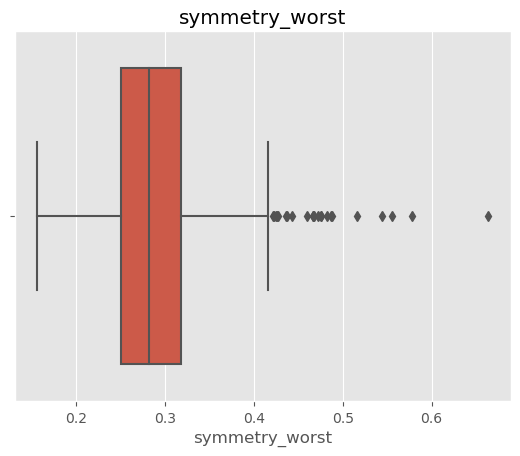

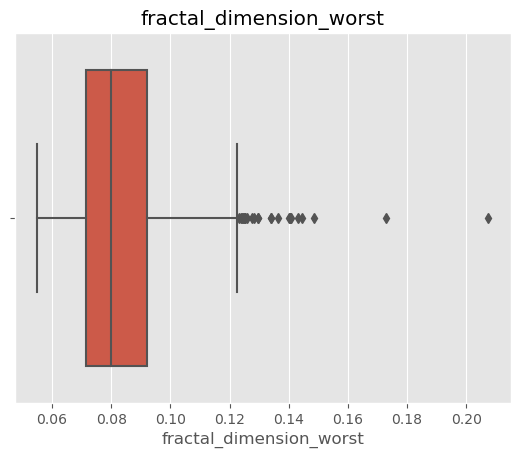

In [16]:
# Realizamos una boxplot de las columnas para identificar cuales cuentan con valores atipicos
# Boxplot

plt.style.use("ggplot")
for col in df_plus.columns:
    sns.boxplot(x= col, data= df_plus)
    plt.title("{}".format(col))
    plt.show()

Nota: Los valores atipicos estan presentes en la mayoria de las columnas

## Analisis de los datos (EDA)

In [17]:
df_plus.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Las 31 columnas se dividen en 3 grupos, cada grupo tiene 10 elementos, estos 10 elementos son
las medidas del nucleo de cada celula.

Los 3 grupos son: "Media, Error estandar y 'worst', el cual es la media de los 3 valores mas grandes"

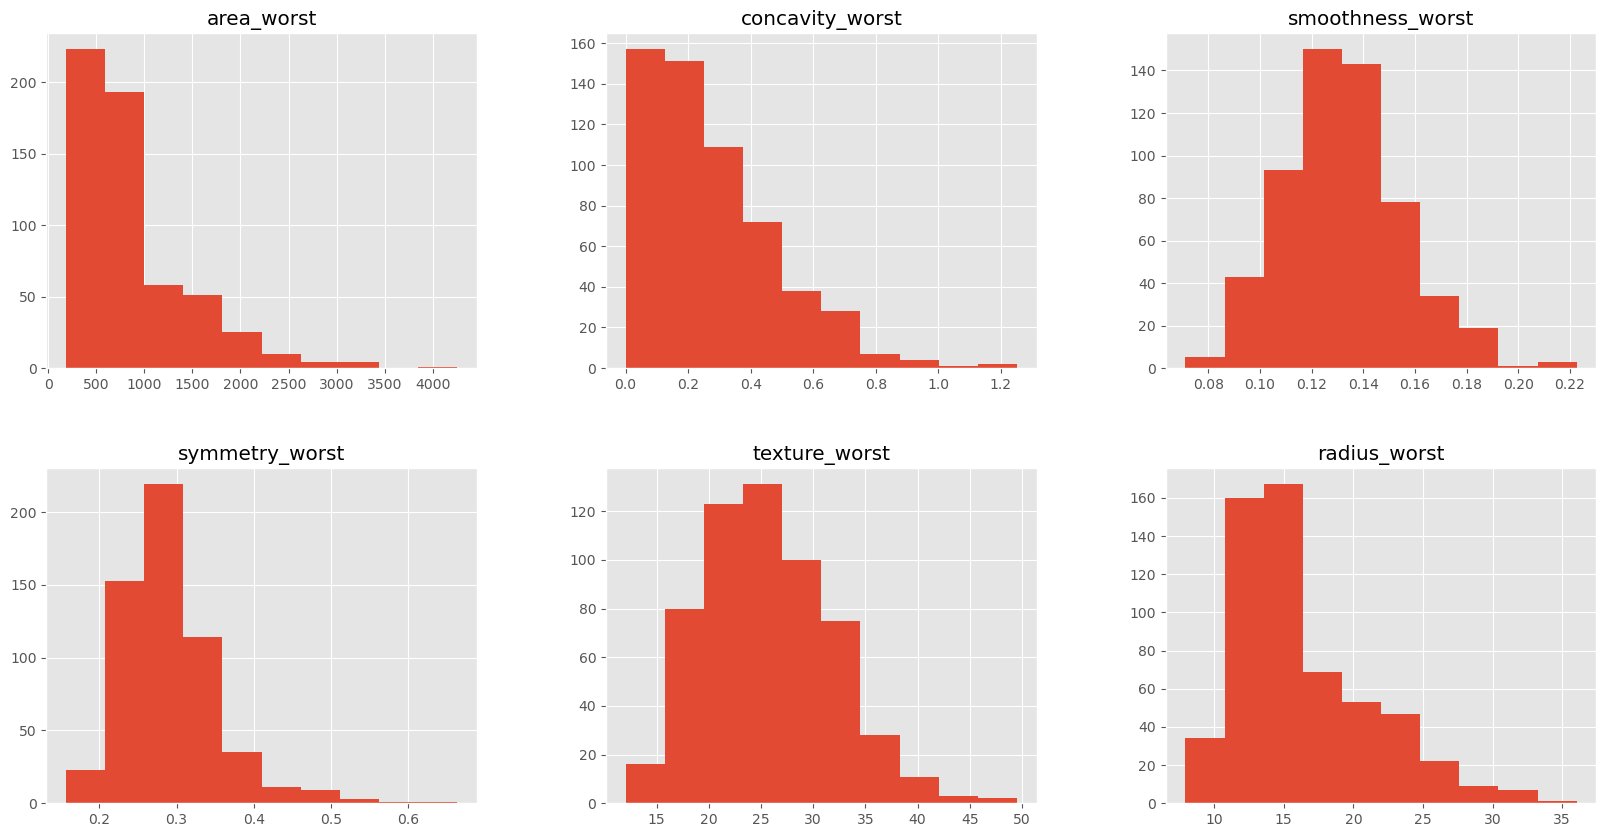

In [18]:
# Histograma de las columnas 'worst'

cols = ['area_worst', 'concavity_worst', 'smoothness_worst', 'symmetry_worst', 'texture_worst',
       'radius_worst']

fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize= (20, 10))
ax = ax.flatten()
i = 0
for c in cols:
	df_plus.hist(c, figsize= (4, 4), ax = ax[i], label = f'{c}')
	i = i+1
plt.show()

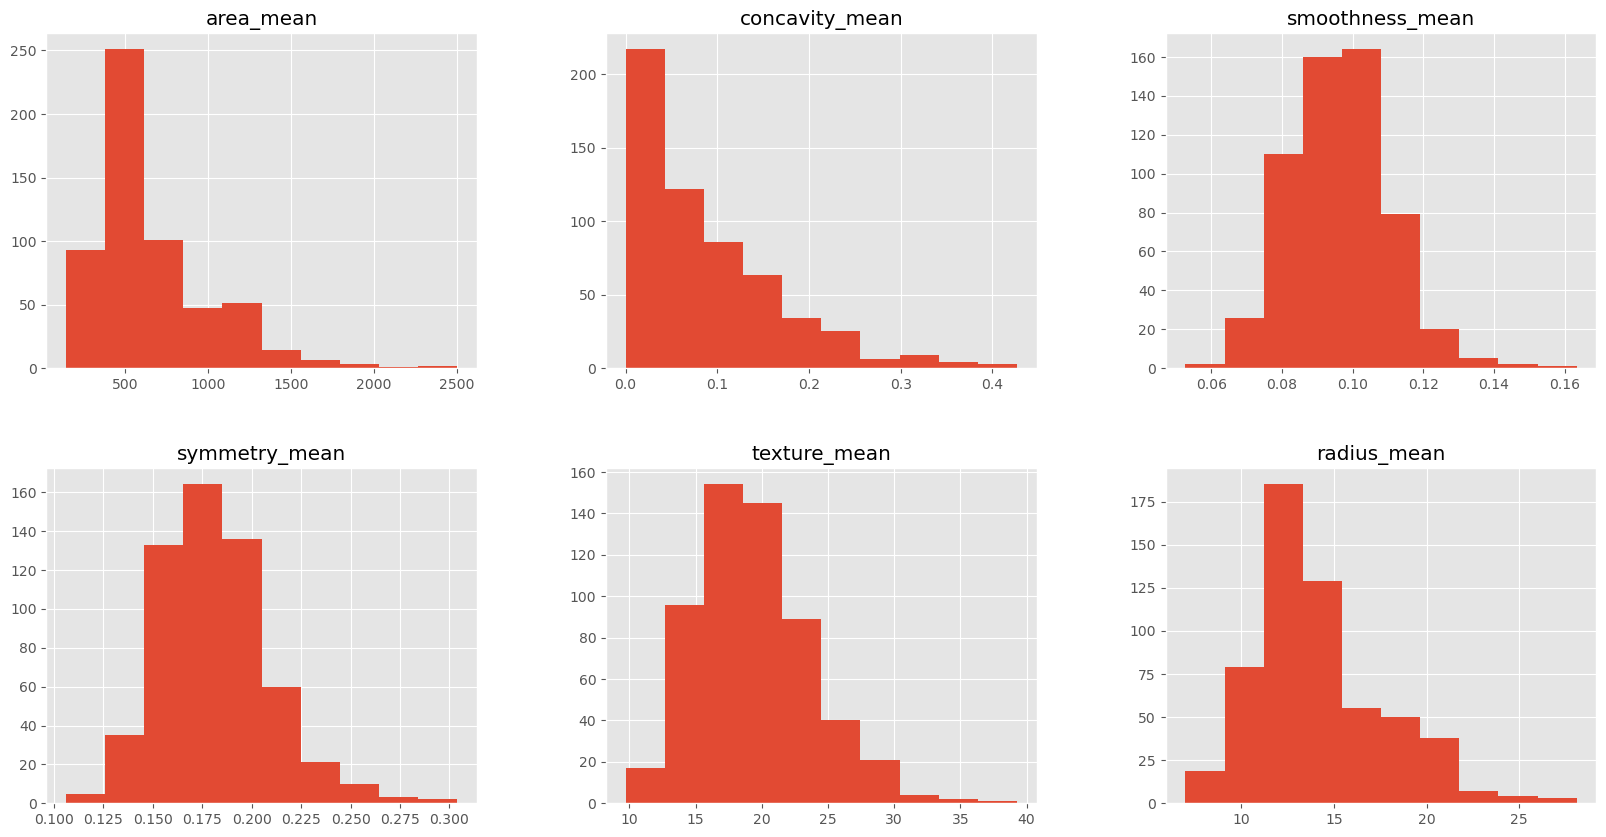

In [19]:
# Histogramas de las columnas 'mean'

cols = ['area_mean', 'concavity_mean', 'smoothness_mean', 'symmetry_mean', 'texture_mean',
       'radius_mean']

fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize= (20, 10))
ax = ax.flatten()
i = 0
for c in cols:
	df_plus.hist(c, figsize= (4, 4), ax = ax[i], label = f'{c}')
	i = i+1
plt.show()

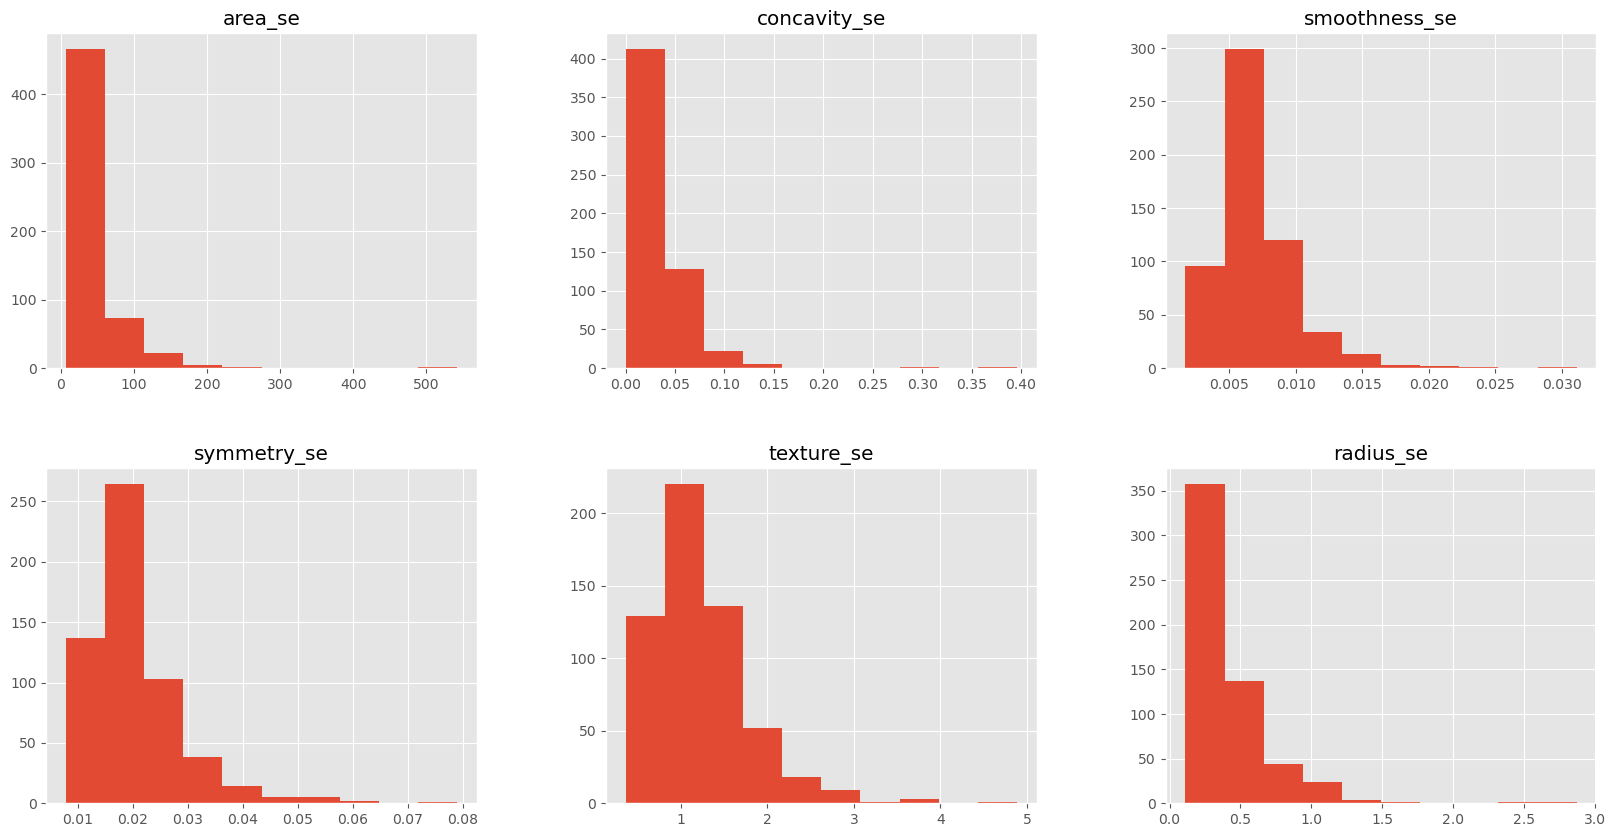

In [20]:
# Histograma de las columnas 'standar error'

cols = ['area_se', 'concavity_se', 'smoothness_se', 'symmetry_se', 'texture_se',
       'radius_se']

fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize= (20, 10))
ax = ax.flatten()
i = 0
for c in cols:
	df_plus.hist(c, figsize= (4, 4), ax = ax[i], label = f'{c}')
	i = i+1
plt.show()

### Comparativa de el radio y textura de la celula en los 3 grupos

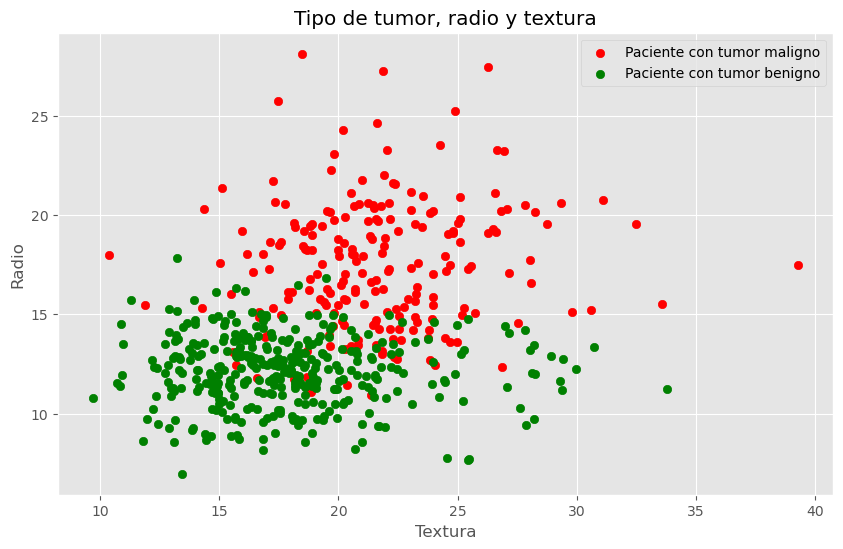

In [21]:
plt.figure(figsize = (10, 6))

plt.scatter(df.texture_mean[df_plus.diagnosis == 1],
           df.radius_mean[df_plus.diagnosis == 1],
           c= "red")

plt.scatter(df.texture_mean[df_plus.diagnosis == 0],
            df.radius_mean[df_plus.diagnosis == 0],
            c= "green")

plt.title("Tipo de tumor, radio y textura")
plt.xlabel("Textura")
plt.legend(["Paciente con tumor maligno", "Paciente con tumor benigno"])
plt.ylabel("Radio");

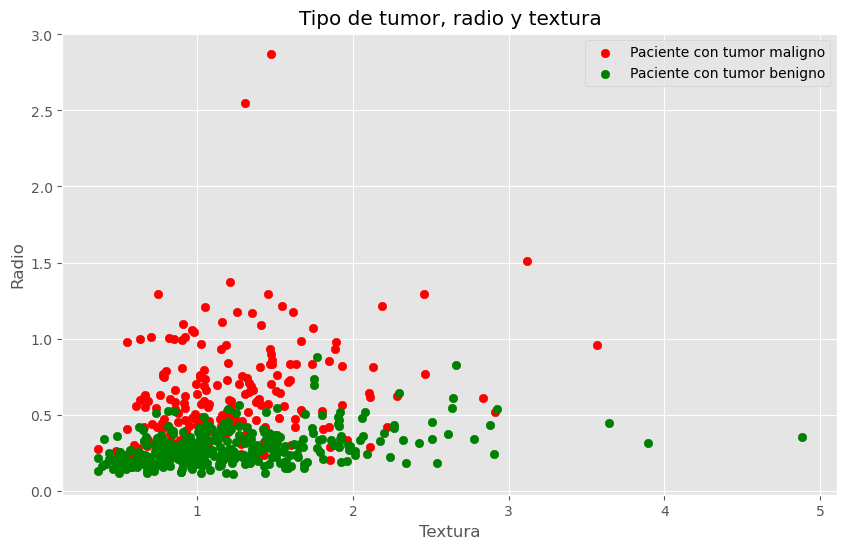

In [22]:
plt.figure(figsize = (10, 6))

plt.scatter(df.texture_se[df_plus.diagnosis == 1],
           df.radius_se[df_plus.diagnosis == 1],
           c= "red")

plt.scatter(df.texture_se[df_plus.diagnosis == 0],
            df.radius_se[df_plus.diagnosis == 0],
            c= "green")

plt.title("Tipo de tumor, radio y textura")
plt.xlabel("Textura")
plt.legend(["Paciente con tumor maligno", "Paciente con tumor benigno"])
plt.ylabel("Radio");

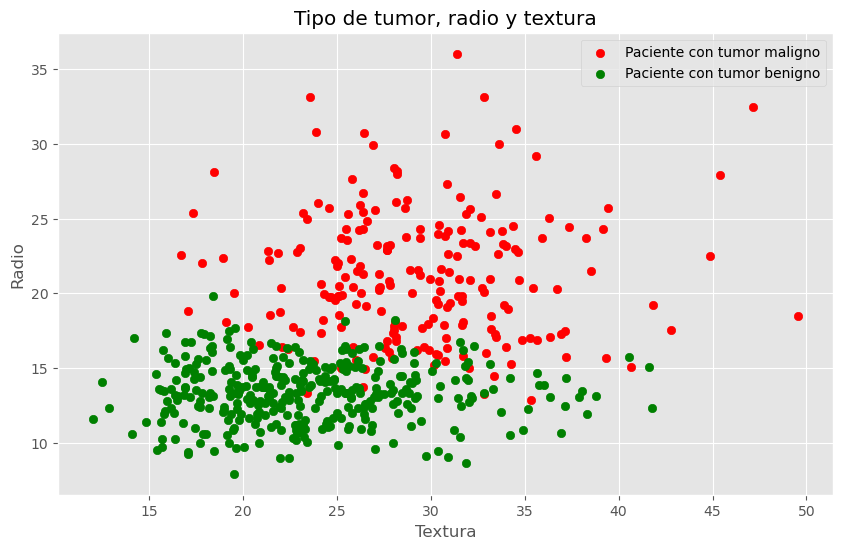

In [23]:
plt.figure(figsize = (10, 6))

plt.scatter(df.texture_worst[df_plus.diagnosis == 1],
           df.radius_worst[df_plus.diagnosis == 1],
           c= "red")

plt.scatter(df.texture_worst[df_plus.diagnosis == 0],
            df.radius_worst[df_plus.diagnosis == 0],
            c= "green")

plt.title("Tipo de tumor, radio y textura")
plt.xlabel("Textura")
plt.legend(["Paciente con tumor maligno", "Paciente con tumor benigno"])
plt.ylabel("Radio");

Nota: Entre mas grande sea el valor del radio y textura de la celula es mas probable que el tumor sea
    maligno

## Matriz de correlacion

In [24]:
corr_matrix = df_plus.corr()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


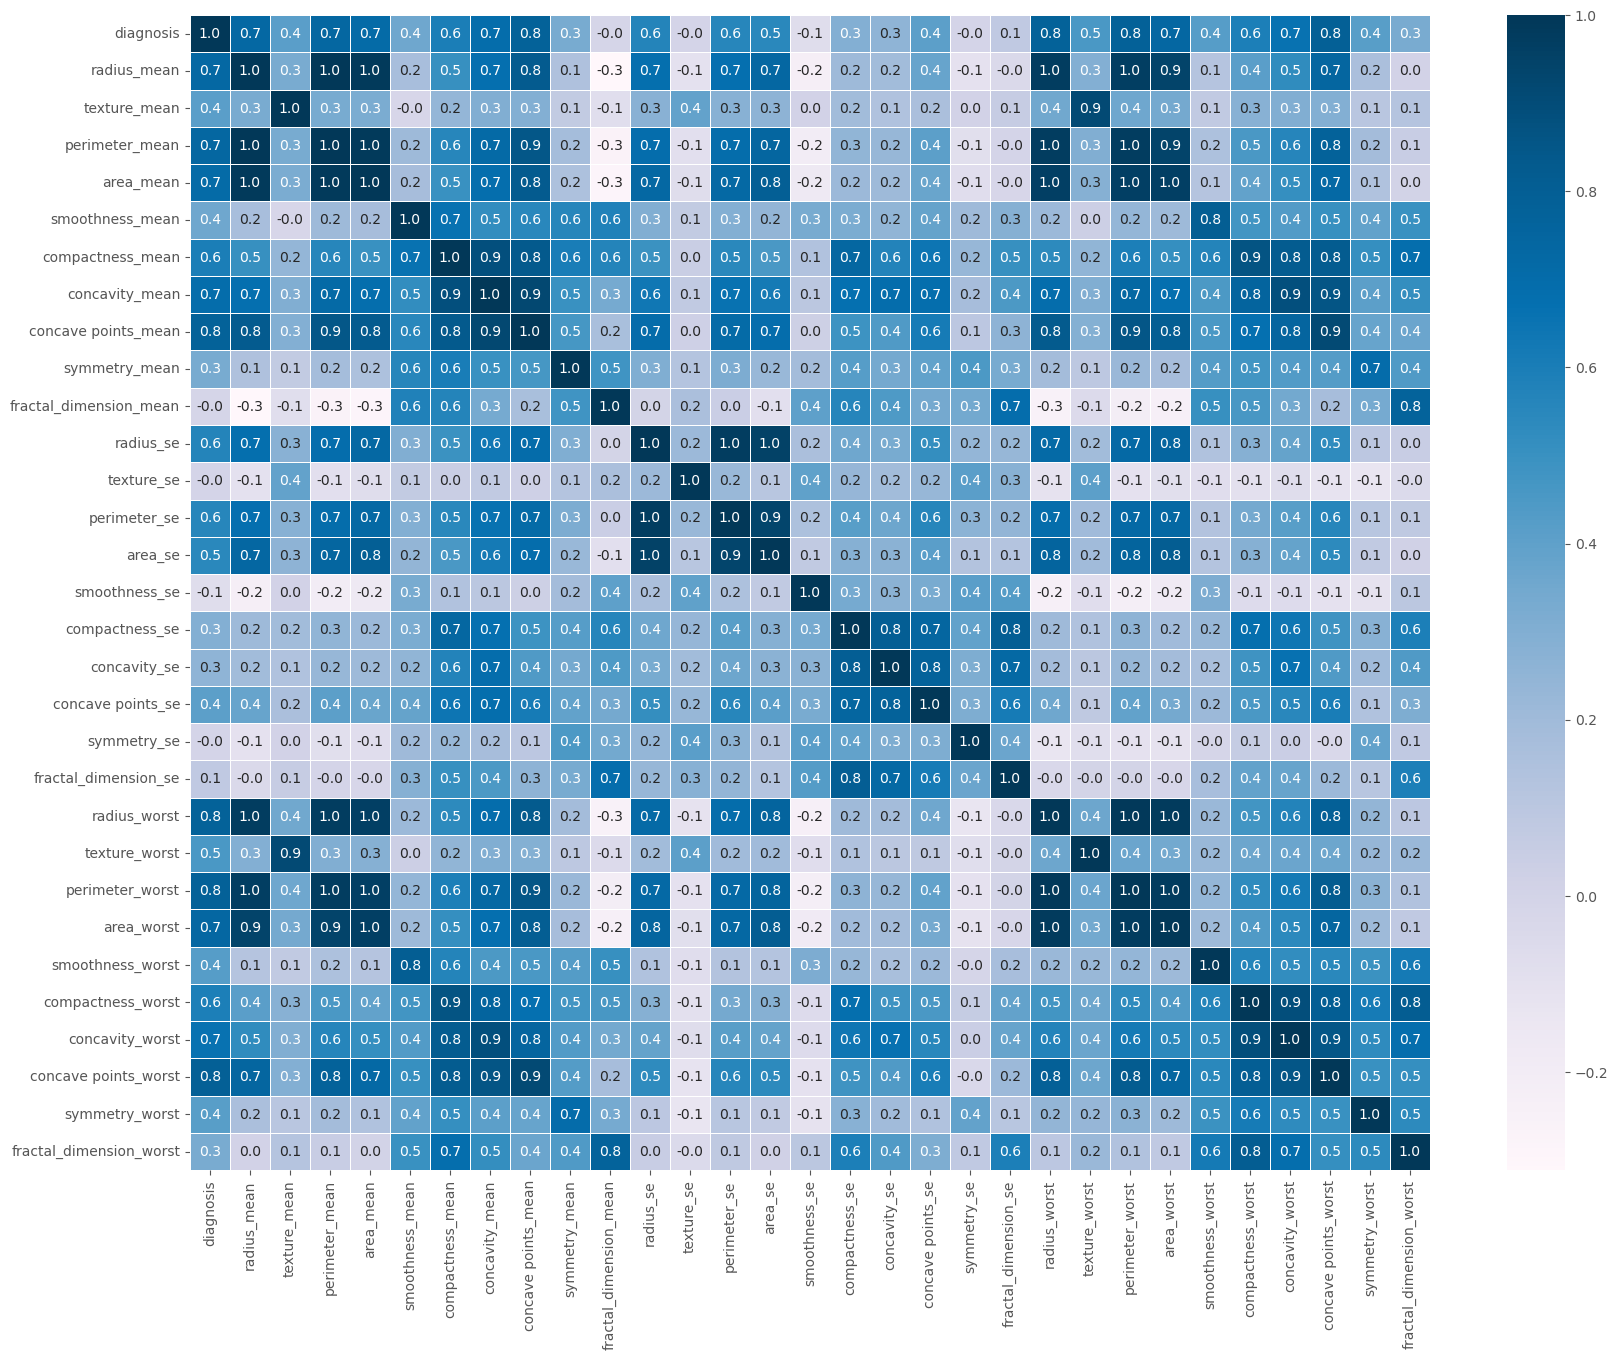

In [25]:
corr_matrix = df_plus.corr()
plt.figure(figsize= (20, 15))
sns.heatmap(corr_matrix,
            annot = True,
            linewidths= 0.5,
            fmt = ".1f",
            cmap = "PuBu");

## Importacion de modelos y su evaluacion

In [26]:
# Modelos

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

# Metricas y evaluadores del modelo

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [27]:
X = df_plus.drop("diagnosis", axis = 1)
y = df_plus.diagnosis.values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [29]:
models = {"KNC": KNeighborsClassifier(),
         "Rf": RandomForestClassifier(),
         "LR": LogisticRegression(),
         "LSVC": LinearSVC(),
         "GNB": GaussianNB()}

def fit_n_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [30]:
model_scores = fit_n_score(models = models,
                           X_train = X_train,
                           X_test = X_test,
                           y_train = y_train,
                           y_test = y_test)

model_scores

{'KNC': 0.956140350877193,
 'Rf': 0.9649122807017544,
 'LR': 0.956140350877193,
 'LSVC': 0.9473684210526315,
 'GNB': 0.9736842105263158}

<AxesSubplot: >

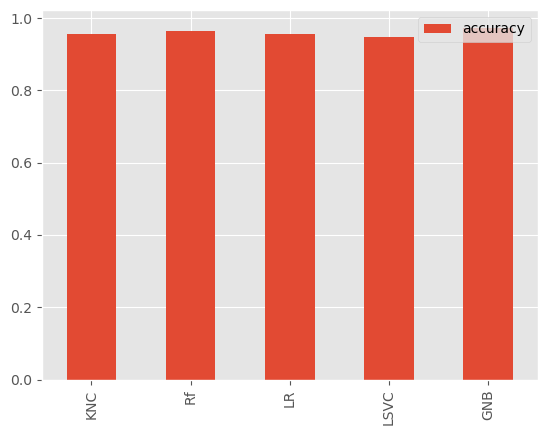

In [31]:
model_graph = pd.DataFrame(model_scores, index = ["accuracy"])
model_graph.T.plot.bar()

Nota: Parece ser que todos los modelos utilizados obtuvieron una buena calificacion
    utilizaremos los 2 mas altos: GaussianNB y RandomForestClassifier

## Ajuste de Hiperparametros

### RandomForestClassifier

In [32]:
# Ajuste de hiperparametros para elmodelo RandomForestClassifier

rf_hyper = {"max_features": ['sqrt', 'log2'], "min_samples_split": [2, 3, 4, 5, 6],  
           "criterion": ['log_loss', 'entropy', 'gini'], "n_estimators": [100, 150, 200],
           "max_depth": [4, 5, 6, 7],
           "max_samples": [100, 150, 200, 250]}

In [33]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_hyper,
                           cv = 5,
                           n_iter = 20,
                           verbose = True,
                           random_state = 35,
                           n_jobs = -1)

gs_rf= GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_hyper,
                     cv = 5,
                     verbose = True,
                     n_jobs = -1)

In [34]:
rs_rf.fit(X_train, y_train)
best_rf_rs = rs_rf.best_params_
score_rf_rs = rs_rf.score(X_test, y_test)

gs_rf.fit(X_train, y_train)
best_rf_gs = gs_rf.best_params_
score_rf_gs = gs_rf.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


In [35]:
gsvrs_rf_tbl = {'Search':['GridSearchCV', 'RandomizedSearchCV'],
                'Best Parameters': [best_rf_gs, best_rf_rs],
                'Score': [score_rf_gs, score_rf_rs]}

Search_score_rf = pd.DataFrame(data = gsvrs_rf_tbl)
Search_score_rf

,Search,Best Parameters,Score
0,GridSearchCV,"{'criterion': 'log_loss', 'max_depth': 7, 'max...",0.964912
1,RandomizedSearchCV,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.964912


In [36]:
best_rf_gs

{'criterion': 'log_loss',
 'max_depth': 7,
 'max_features': 'log2',
 'max_samples': 250,
 'min_samples_split': 6,
 'n_estimators': 100}

### GaussianNB

In [37]:
gnb_hyper = {"priors": [None],
              "var_smoothing": np.logspace(0,-20, num=100)}

In [38]:
rs_gnb = RandomizedSearchCV(GaussianNB(),
                           param_distributions= gnb_hyper,
                           cv = 5,
                           n_iter = 20,
                           verbose = True,
                           random_state = 35,
                           n_jobs = -1)

gs_gnb= GridSearchCV(GaussianNB(),
                     param_grid = gnb_hyper,
                     cv = 5,
                     verbose = True,
                     n_jobs = -1)

In [39]:
rs_gnb.fit(X_train, y_train)
best_gnb_rs = rs_gnb.best_params_
score_gnb_rs = rs_gnb.score(X_test, y_test)

gs_gnb.fit(X_train, y_train)
best_gnb_gs = gs_gnb.best_params_
score_gnb_gs = gs_gnb.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [40]:
gsvrs_gnb_tbl = {'Search':['GridSearchCV', 'RandomizedSearchCV'],
                'Best Parameters': [best_gnb_gs, best_gnb_rs],
                'Score': [score_gnb_gs, score_gnb_rs]}

Search_score_gnb = pd.DataFrame(data = gsvrs_gnb_tbl)
Search_score_gnb

,Search,Best Parameters,Score
0,GridSearchCV,"{'priors': None, 'var_smoothing': 3.0538555088...",0.964912
1,RandomizedSearchCV,"{'var_smoothing': 4.534878508128591e-15, 'prio...",0.964912


In [41]:
best_gnb_gs

{'priors': None, 'var_smoothing': 3.0538555088334124e-12}

### Eleccion de los mejores parametros para cada modelo

In [42]:
# RandomForestClassifier

rf = RandomForestClassifier(criterion = "entropy",
 max_depth= 7,
 max_features= "log2",
 max_samples= 250,
 min_samples_split= 3,
 n_estimators= 200)

# GaussianNB

gnb = GaussianNB(priors = None, var_smoothing = 3.0538555088334124e-12)

rf.fit(X_train, y_train)
gnb.fit(X_train, y_train)


GaussianNB(var_smoothing=3.0538555088334124e-12)

## Evaluacion del modelo

In [43]:
y_preds_rf = rf.predict(X_test)
y_preds_gnb = gnb.predict(X_test)

### Matriz de confusion

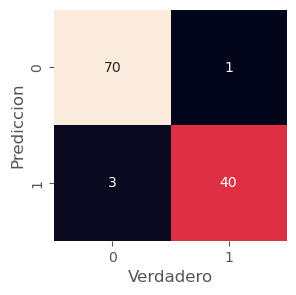

In [44]:
# RandomForestClassifier

def plot_conf_mat(y_test, y_preds_rf):
    fig, ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds_rf),
                     annot = True,
                     cbar = False)
    plt.xlabel("Verdadero")
    plt.ylabel("Prediccion")
    
plot_conf_mat(y_test, y_preds_rf)

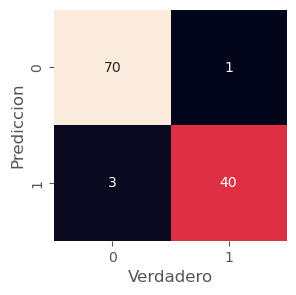

In [45]:
# GaussianNB

def plot_conf_mat(y_test, y_preds_gnb):
    fig, ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds_gnb),
                     annot = True,
                     cbar = False)
    plt.xlabel("Verdadero")
    plt.ylabel("Prediccion")
    
plot_conf_mat(y_test, y_preds_gnb)

### Curva ROC

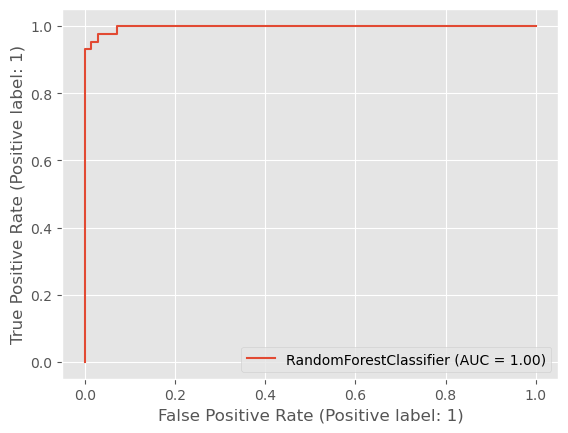

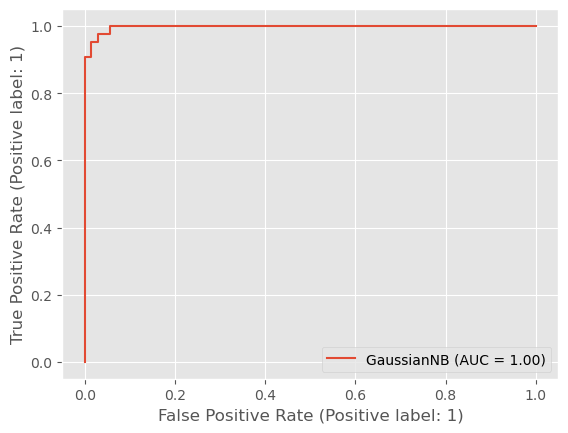

In [46]:
# RandomForestClassifier

plot_roc_curve(rf, X_test, y_test)

# GaussianNB

plot_roc_curve(gnb, X_test, y_test)

### Reporte de clasificacion

In [47]:
print("RandomForestClassifier")
print(classification_report(y_test, y_preds_rf))
print("-"*100)
print("GaussianNB")
print(classification_report(y_test, y_preds_gnb))

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

----------------------------------------------------------------------------------------------------
GaussianNB
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Validacion cruzada

In [48]:
# RandomForestClassifier

cv_acc_rf = np.mean(cross_val_score(rf, X, y, cv=5, scoring = "accuracy"))
cv_prec_rf = np.mean(cross_val_score(rf, X, y, cv=5, scoring = "precision"))
cv_rec_rf = np.mean(cross_val_score(rf, X, y, cv=5, scoring = "recall"))
cv_f1_rf = np.mean(cross_val_score(rf, X, y, cv=5, scoring = "f1"))

In [49]:
# GaussianNB

cv_acc_gnb = np.mean(cross_val_score(gnb, X, y, cv=5, scoring = "accuracy"))
cv_prec_gnb = np.mean(cross_val_score(gnb, X, y, cv=5, scoring = "precision"))
cv_rec_gnb = np.mean(cross_val_score(gnb, X, y, cv=5, scoring = "recall"))
cv_f1_gnb = np.mean(cross_val_score(gnb, X, y, cv=5, scoring = "f1"))

In [50]:
score_tbl = {
            'Modelos': ['RandomForestClassifier', 'GaussianNB'],
            'Accuracy': [cv_acc_rf, cv_acc_gnb],
            'Precision': [cv_prec_rf, cv_prec_gnb],
            'Recall': [cv_rec_rf, cv_rec_gnb],
            'F1': [cv_f1_rf, cv_f1_gnb]
}

metric_scores = pd.DataFrame(data = score_tbl)
metric_scores

,Modelos,Accuracy,Precision,Recall,F1
0,RandomForestClassifier,0.966636,0.957203,0.934330,0.945022
1,GaussianNB,0.927930,0.912332,0.896567,0.902909


## LazyPredict y nuevos modelos

Utilizaremos LazyPredict para buscar un mejor modelo en un mayor catalogo de modelos

### LazyPredict

In [51]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [52]:
from lazypredict.Supervised import LazyClassifier

In [53]:
laz_class = LazyClassifier(verbose= "", ignore_warnings = True, custom_metric= None)

In [54]:
models = laz_class.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.25it/s]


In [55]:
models

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 BernoulliNB                        0.98               0.98     0.98      0.98   
 PassiveAggressiveClassifier        0.98               0.98     0.98      0.98   
 SVC                                0.98               0.98     0.98      0.98   
 Perceptron                         0.97               0.97     0.97      0.97   
 AdaBoostClassifier                 0.97               0.97     0.97      0.97   
 LogisticRegression                 0.97               0.97     0.97      0.97   
 SGDClassifier                      0.96               0.97     0.97      0.97   
 ExtraTreeClassifier                0.96               0.97     0.97      0.97   
 CalibratedClassifierCV             0.97               0.97     0.97      0.97   
 RandomForestClassifier             0.96               0.96     0.96      0.96   
 LGBMClassifier 

## Evaluacion de nuevos modelos

In [103]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier

In [104]:
models = {"BNB": BernoulliNB(),
         "PAC": PassiveAggressiveClassifier(),
         "SVC": SVC(),
         "PCN": Perceptron(),
         "ABC": AdaBoostClassifier()}

def fit_n_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [106]:
model_scores = fit_n_score(models = models,
                           X_train = X_train,
                           X_test = X_test,
                           y_train = y_train,
                           y_test = y_test)

model_scores

{'BNB': 0.6228070175438597,
 'PAC': 0.9210526315789473,
 'SVC': 0.9473684210526315,
 'PCN': 0.9473684210526315,
 'ABC': 0.9736842105263158}

<AxesSubplot: >

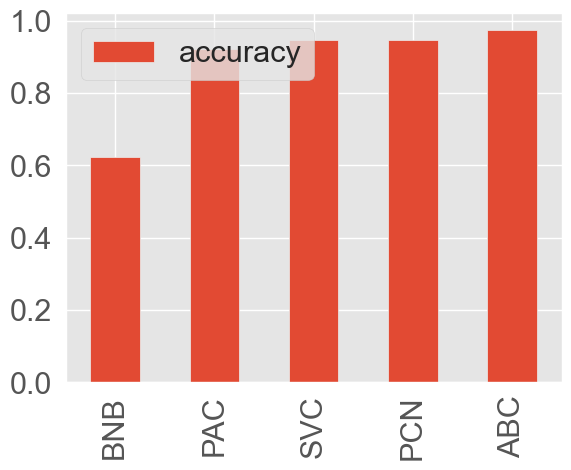

In [107]:
model_graph = pd.DataFrame(model_scores, index = ["accuracy"])
model_graph.T.plot.bar()

### Ajuste de hiperparametros de AdaBoostClassifier

In [108]:
abc_hyper = {"n_estimators": [50, 10, 150],
            "learning_rate": [1.0, 1.50, 2.0], "algorithm": ['SAMME', 'SAMME.R'], "random_state":[1, 5, 10] }

In [109]:
rs_abc = RandomizedSearchCV(AdaBoostClassifier(),
                           param_distributions= abc_hyper,
                           cv = 5,
                           n_iter = 20,
                           verbose = True,
                           random_state = 35,
                           n_jobs = -1)

gs_abc= GridSearchCV(AdaBoostClassifier(),
                     param_grid = abc_hyper,
                     cv = 5,
                     verbose = True,
                     n_jobs = -1)

In [110]:
rs_abc.fit(X_train, y_train)
best_abc_rs = rs_abc.best_params_
score_abc_rs = rs_abc.score(X_test, y_test)

gs_abc.fit(X_train, y_train)
best_abc_gs = gs_abc.best_params_
score_abc_gs = gs_abc.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [112]:
gsvrs_abc_tbl = {'Search':['GridSearchCV', 'RandomizedSearchCV'],
                'Best Parameters': [best_abc_gs, best_abc_rs],
                'Score': [score_abc_gs, score_abc_rs]}

Search_score_abc = pd.DataFrame(data = gsvrs_abc_tbl)
Search_score_abc

,Search,Best Parameters,Score
0,GridSearchCV,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '...",0.96
1,RandomizedSearchCV,"{'random_state': 5, 'n_estimators': 150, 'lear...",0.97


In [113]:
best_abc_rs

{'random_state': 5,
 'n_estimators': 150,
 'learning_rate': 1.0,
 'algorithm': 'SAMME'}

In [114]:
abc = AdaBoostClassifier(random_state = 5, n_estimators = 150, learning_rate = 1.0, algorithm = 'SAMME')

abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=150, random_state=5)

In [115]:
y_preds_abc = abc.predict(X_test)

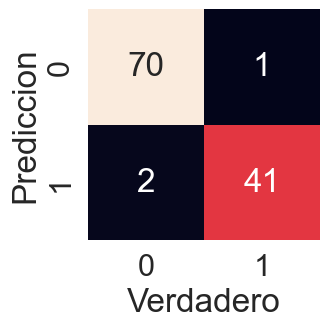

In [116]:
# Matriz de confusion

sns.set(font_scale = 2.0)

def plot_conf_mat(y_test, y_preds_abc):
    fig, ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds_abc),
                     annot = True,
                     cbar = False)
    
    plt.xlabel("Verdadero")
    plt.ylabel("Prediccion")
    
plot_conf_mat(y_test, y_preds_abc)  

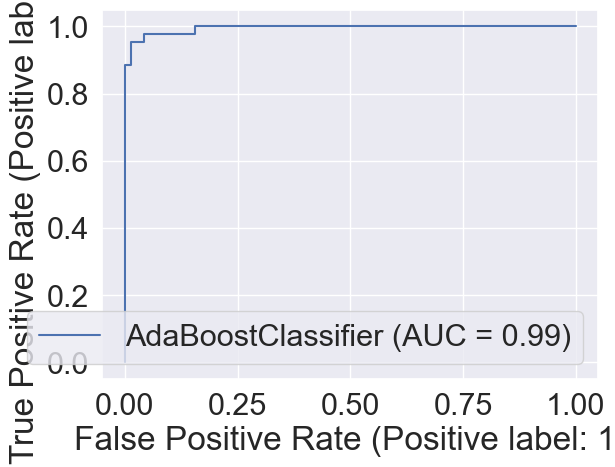

In [117]:
# Curva ROC

plot_roc_curve(abc, X_test, y_test)

In [118]:
# Reporte de clasificacion

print("AdaBoostClasifier")
print(classification_report(y_test, y_preds_abc))

AdaBoostClasifier
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [119]:
# Validacion cruzada



cv_acc_abc = np.mean(cross_val_score(abc, X, y, cv=5, scoring = "accuracy"))
cv_prec_abc = np.mean(cross_val_score(abc, X, y, cv=5, scoring = "precision"))
cv_rec_abc = np.mean(cross_val_score(abc, X, y, cv=5, scoring = "recall"))
cv_f1_abc = np.mean(cross_val_score(abc, X, y, cv=5, scoring = "f1"))


In [120]:
score_tbl = {
            'Modelos': ['AdaBoostClassifier'],
            'Accuracy': [cv_acc_abc],
            'Precision': [cv_prec_abc],
            'Recall': [cv_rec_abc],
            'F1': [cv_f1_abc]
}

metric_scores = pd.DataFrame(data = score_tbl)
metric_scores

,Modelos,Accuracy,Precision,Recall,F1
0,AdaBoostClassifier,0.98,0.98,0.95,0.97


### Comparativa

In [122]:
score_tbl = {
            'Modelos': ['RandomForestClassifier', 'GaussianNB', 'AdaBoostClassifier'],
            'Accuracy': [cv_acc_rf, cv_acc_gnb, cv_acc_abc],
            'Precision': [cv_prec_rf, cv_prec_gnb, cv_prec_abc],
            'Recall': [cv_rec_rf, cv_rec_gnb, cv_rec_abc],
            'F1': [cv_f1_rf, cv_f1_gnb, cv_f1_abc]
}

metric_scores = pd.DataFrame(data = score_tbl)
metric_scores

,Modelos,Accuracy,Precision,Recall,F1
0,RandomForestClassifier,0.97,0.96,0.93,0.95
1,GaussianNB,0.93,0.91,0.90,0.90
2,AdaBoostClassifier,0.98,0.98,0.95,0.97
